In [1]:
RANDOM_STATE = 85

The goal is to check what division into 'bad' and 'good' topics works better. 

For the step with ‘good’ and ‘bad’ comments:
    
    * Select 20 random comments from ‘good’ and ‘bad’ and annotate them manually; calculate a proportion of how many comments are indeed ‘good’ and ‘bad’.

For the step with ‘good’ and ‘bad’ topics:
    
    * Select 10 random topics from ‘good’ and ‘bad’, look at their comments, and annotate topics manually; calculate a proportion of how many topics are indeed ‘good’ and ‘bad’.
    * See if topics with high and low average likes ended up in ‘good’ and ‘bad’ topics.


## Evaluate bad-good comments division

In [13]:
import pandas as pd

In [14]:
path = '/home/anna/Documents/Diploma/other_dumps/comments'

In [15]:
# input: file with all comments and their scores
file = 'VER1_all_comments_to_theories_with_scores.csv'

In [16]:
df_to_evaluate = pd.read_csv(f'{path}/{file}')

In [17]:
df_to_evaluate.head()

,id,status,thread,text,time,content_link,block_name,enabled,abuses,likes,replies,anon_user_id,area,step_id,topic_id,lemmatized_comments,count_bad,TextBlobPolarity,FlairPolarity,comment_grades
0,9403,fixed,comment,"""...to divide between two your friends""\r\nI t...",2019-06-08 20:14:45,https://hyperskill.org/learn/step/5614,text,0,0,0,0,45,math,5614,370.0,""" ... to divide between two your friend "" \r\n...",0,0.000000,0.817580,1
1,9408,won't fix,comment,"It was not completely clear for me, how to con...",2019-06-08 20:32:26,https://hyperskill.org/learn/step/5614,text,1,0,3,2,45,math,5614,370.0,"it be not completely clear for I , how to conv...",3,0.065278,-0.999997,0
2,15054,fixed,feedback,completly not understood,2019-07-09 11:11:43,https://hyperskill.org/learn/step/5753,text,1,0,0,0,105,math,5753,385.0,completly not understand,1,0.000000,-0.999818,0
3,15115,fixed,feedback,A better explanation is needed with clear defi...,2019-07-09 17:34:21,https://hyperskill.org/learn/step/5753,text,1,0,0,0,109,math,5753,385.0,a well explanation be need with clear definiti...,4,0.300000,0.765204,1
4,15268,fixed,comment,>remember that 2^8 in decimal is 1000 0000 in ...,2019-07-10 16:03:41,https://hyperskill.org/learn/step/5753,text,0,0,1,0,122,math,5753,385.0,> remember that 2 ^ 8 in decimal be 1000 0000 ...,0,0.000000,-0.999927,1


<AxesSubplot:>

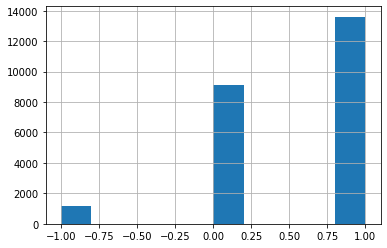

In [6]:
df_to_evaluate.comment_grades.hist()

In [ ]:
# we evaluate not only the work of sentiment systems but also how the identification of 'suspicious' comments works
# so we look not at just 'positive' and 'negative' comments, but at those that have 'count_bad' > 0 

In [13]:
df_good_comments = df_to_evaluate[df_to_evaluate.comment_grades == 1]
df_good_comments = df_good_comments[df_good_comments.count_bad > 1]

df_bad_comments = df_to_evaluate[df_to_evaluate.comment_grades == -1]
df_bad_comments = df_bad_comments[df_bad_comments.count_bad > 1]

In [16]:
print(df_bad_comments.shape[0], df_good_comments.shape[0])

495 778


In [20]:
# now we select 20 random from good and 20 random from bad and show them prettily for evaluation
for el in df_good_comments.sample(20, random_state=RANDOM_STATE).text.values:
    print(el)
    print('<------------------------------>')

My intro to programming 1 professors from a couple years ago should have explained classes like this, great!
<------------------------------>
I was still a bit confused on how to apply these concepts to my code but will learn as I go with where is the best scenario to apply these operators/ evaluations.
<------------------------------>
best link for learning?
<------------------------------>
Great explanation of the Manifest file. Concise and straightforward as always. Nice!
<------------------------------>
Would be great to have some more explanation along with examples for hiding versus overriding
<------------------------------>
this theory is good i was studying 2011 information technology some words im familear with
<------------------------------>
This is one of the best articles I've read on this website. Thumbs up for the Effective Java reference as well. Great job
<------------------------------>
Hi! It can be called however you want to call it. 
(args_for_function) == the arg

In [21]:
for el in df_bad_comments.sample(20, random_state=RANDOM_STATE).text.values:
    print(el)
    print('<------------------------------>')

It's kinda hard to understand (I am not from CS background)
<------------------------------>
Incorrect grammar is confusing in a couple cases. Could use a rewrite.
<------------------------------>
It's never explained how do we combine the subarrays. While it's intuitive to merge subarrays like: {21} and {30}, it's much harder to tell how would we go about merging {19, 21, 23, 30} with {11, 23, 28}. Saying "we merge two subarrays to produce a sorted input array: { 11, 19, 21, 23, 23, 28, 30 }" is not an explanation.
<------------------------------>
poor explanations
<------------------------------>
Very hard to understand.
<------------------------------>
I found two difficult words in two hint boxes.
box1(blue colored box)
......." commented by placing the caret on the line and pressing Ctrl /." In this sentence word, 'caret' is difficult to understand for a beginner maybe we can replace it with 'cursor'.
box2
....... "which might not be that simple for padawans." ...... In this sente

## Evaluate bad-good topics division

In [ ]:
# input: topics with target features + file with comments

In [22]:
file_with_comments = '../other_dumps/comments/all_comments_to_theories.csv'
file_with_targets = './new_cleaned/train_corpus/target_features/topic_ids_with_target_features_VER1.csv'

In [23]:
df_with_targets = pd.read_csv(file_with_targets)
df_with_comments = pd.read_csv(file_with_comments)

In [24]:
df_with_targets.head()

,topic_id,target
0,1536,0
1,515,0
2,1540,0
3,1029,0
4,1030,0


In [25]:
sample_good_topics = df_with_targets[df_with_targets.target == 0].sample(3, random_state=RANDOM_STATE)
sample_bad_topics = df_with_targets[df_with_targets.target == 1].sample(3, random_state=RANDOM_STATE)

In [32]:
for i, row in sample_good_topics.iterrows():
    all_comments_to_topic = df_with_comments[df_with_comments.topic_id == row.topic_id]
    print('##################' * 2 + ' ' + str(row.topic_id) + ' ' + '##################' * 2)
    for el in all_comments_to_topic.text.values:
        if len(el) < 50000:
            print(el)
            print('<------------------------------>')
    print()

#################################### 213 ####################################
I love the way the tutoring is taken stepwisely, for instance, taking about data types in variables you say: Variables can store not only strings, but also numbers, characters, and other data types, which we will meet further. 
You don't introduce everything at once, and that's nice!
<------------------------------>
I would prefer a bit more theory.
<------------------------------>
да и то что, разработчики языка в принципе создали ресурс по обучению языку, уже большой и полезный вклад
<------------------------------>
The instructions were very clear and easy to understand.
<------------------------------>
Maybe we should use the term *read-only* instead of *immutable* here.  See also: https://kotlinlang.org/docs/reference/basic-syntax.html#defining-variables
<------------------------------>
Systems Developers love to make terminlogy more complicated than it really needs to be.
<------------------------------

## All together for new files

### Prepare things

In [2]:
import pandas as pd

In [3]:
file_with_comments = '../other_dumps/comments/all_comments_to_theories.csv'

In [4]:
def show_20_comments(df_to_evaluate_with_comment_scores, good=True, random_state=RANDOM_STATE):
    # the final score of the comment is supposed to be in the column 'comment_grades'
    # the suspiciousness of the comment is supposed to be in the column 'count_bad'
    if good:
        sentiment = 1
    else:
        sentiment = -1
    
    df_with_comments = df_to_evaluate_with_comment_scores[df_to_evaluate_with_comment_scores.comment_grades == sentiment]
    df_with_comments = df_with_comments[df_with_comments.count_bad > 1]
    
    for i, el in enumerate(df_with_comments.sample(20, random_state=random_state).text.values):
        print(str(i+1) + ' ' + el)
        print('<------------------------------>')

In [15]:
def show_20_comments_ver5(df_to_evaluate_with_comment_scores, good=False, random_state=RANDOM_STATE):
    # the final score of the comment is supposed to be in the column 'comment_grades'
    # the suspiciousness of the comment is supposed to be in the column 'count_bad'
    if good:
        sentiment = 1
    else:
        sentiment = -1
    
    df_with_comments = df_to_evaluate_with_comment_scores[df_to_evaluate_with_comment_scores.comment_grades == sentiment]
    
    for i, el in enumerate(df_with_comments.sample(20, random_state=random_state).text.values):
        print(str(i+1) + ' ' + el)
        print('<------------------------------>')

In [5]:
def show_comments_for_10_topics(df_with_comments, df_with_targets, good=True, random_state=RANDOM_STATE):
    if good:
        target = 0
    else:
        target = 1
        
    sample_topics = df_with_targets[df_with_targets.target == target].sample(10, random_state=random_state)
    
    for i, row in enumerate(sample_topics.iterrows()):
        row = row[1]
        all_comments_to_topic = df_with_comments[df_with_comments.topic_id == row.topic_id]
        print(str(i+1) + ' ' + '##################' * 2 + ' ' + \
              str(row.topic_id) + ' ' + '##################' * 2)
        for j, el in enumerate(all_comments_to_topic.text.values):
            if len(el) < 50000:
                print(str(j+1) + ' ' + el)
                print('<------------------------------>')
        print()
    

### Run things

Write results of evaluation here: https://docs.google.com/spreadsheets/d/1l_-Ta0FLwBGJwRcincPdfy176QhUoCAfVxA4iJSM5I0/edit#gid=0

In [19]:
# change here
file_with_comments_with_scores = '../other_dumps/comments/VER5_all_comments_to_theories_with_scores.csv'
file_with_targets = './new_cleaned/train_corpus/target_features/topic_ids_with_target_features_VER5_with_likes.csv'

In [20]:
df_with_comments = pd.read_csv(file_with_comments)
df_with_comments_with_scores = pd.read_csv(file_with_comments_with_scores)
df_with_targets = pd.read_csv(file_with_targets)

In [8]:
show_20_comments(df_with_comments_with_scores, good=True)  # there are no 'good' comments, only neutral

ValueError: a must be greater than 0 unless no samples are taken

In [16]:
# show_20_comments(df_with_comments_with_scores, good=False)
show_20_comments_ver5(df_with_comments_with_scores, good=False)

1 lambda is confusing because the reason to use it is not given clearly. the human brain only makes the effort to remember things when they are useful. I get the synthetic sugar part, but it does not explain why I should go through all the trouble to reduce the arguments of a function
<------------------------------>
2 Everything is OK, but this phrase is quite misleading: "You need to write the command itself, the ID of the commit you want to *delete*, and the name of the file where the wrong change was made.".

We don't delete that commit, we select the file state on that commit.
<------------------------------>
3 Provide the complete code and then output as it is not helpful to write programs in problem.
<------------------------------>
4 Really hard to understand.
<------------------------------>
5 The chapter with elif blocks is very detailed. They even inserted pictures. Such a detailed description is lacking in other topics, where a very complex material is presented in a couple

In [21]:
show_comments_for_10_topics(df_with_comments, df_with_targets, good=True)

1 #################################### 1476 ####################################
1 Isn't this topic repetitive to "Bugs and Debbuging", is it?
<------------------------------>
2 I suppose the topic is much more about Debugging. The first one tries to explain what is a bug🖖🏼
<------------------------------>
3 I put the sad face on accident
<------------------------------>
4 And where are the examples of working with debugger in IDE (GoLand, for example)?
<------------------------------>

2 #################################### 1744 ####################################
1 Add methods setRGB() and getRGB()
<------------------------------>
2 5. Editing Images is unclear
<------------------------------>
3 "Defining the form of a triangle is beyond the scope of the current lesson." :-D
<------------------------------>
4 This is AWESOME :)
<------------------------------>

3 #################################### 1586 ####################################
1 There's an error in paragraph 2, the blo

In [22]:
show_comments_for_10_topics(df_with_comments, df_with_targets, good=False)

1 #################################### 321 ####################################
1 Complexity formula it's very difficult to understand :/
<------------------------------>
2 Complexity analysis needs to be a little less complex. You should explain things a bit better. For example, I don't understand why we're adding 1 here -> ∣t∣−∣p∣+1
Also, for others, a simpler approach for understanding this could be:
In worst case scenario, you would have to traverse the entire string and match each character with the pattern. 
If ∣t∣ is the length of the string and ∣p∣ is the length of the pattern, then matching the pattern with each character of the input string means:
∣t∣⋅∣p∣ = O(∣t∣⋅∣p∣)
<------------------------------>
3 thanks
<------------------------------>
4 (|t|-|p| -1)*p is not the max number of operations -- the max num of operatios is |t|*|p|
<------------------------------>
5 +1 is just how the universe works. If you lay pattern p against the suffix of text t, |t| - |p| is how many fre